## Index of Economic Freedom

This notebook explores clustering with the K-means algorithm.

### Contents of this notebook
#### 01. Importing libraries
#### 02. Importing dataframe
#### 03. Data imputation
#### 04. The elbow technique
#### 05. K-means clustering
#### 06. Exporting the dataframe

### 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Importing the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures that the graphs created are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

### 02. Importing dataframe

In [3]:
# I imported the data without the imputed medians for some columns to see if it works. If not, I will impute all columns with N/A with the median.

df_freedom = pd.read_excel(r'C:\Users\veren\Python Data\Economic Freedom Index\02 Data\Prepared Data\data-economic-freedom-prights-category.xlsx', index_col=False)

In [4]:
df_freedom.shape

(5152, 19)

In [5]:
df_freedom.head()

,Unnamed: 0,Name,Latitude,Longitude,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Property Rights Category
0,0,Afghanistan,33.939110,67.709953,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Albania,41.153332,20.168331,2022,66.6,55.5,35.6,49.8,89.1,72.1,70.6,70.7,51.1,82.0,82.6,70.0,70.0,Medium Score
2,2,Algeria,28.033886,1.659626,2022,45.8,27.9,30.1,29.7,67.2,57.1,38.6,50.0,51.5,80.1,57.4,30.0,30.0,Low Score
3,3,Angola,-11.202692,17.873887,2022,52.6,39.8,20.6,25.3,86.6,86.4,80.0,37.6,53.9,61.2,70.0,30.0,40.0,Low Score
4,4,Argentina,-38.416097,-63.616672,2022,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0,Low Score


### 03. Data imputation

In [6]:
# Dropping the index column

df_freedom.drop(df_freedom.columns[0], axis=1, inplace =True)

In [7]:
df_freedom.head()

,Name,Latitude,Longitude,Index Year,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,Property Rights Category
0,Afghanistan,33.939110,67.709953,2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Albania,41.153332,20.168331,2022,66.6,55.5,35.6,49.8,89.1,72.1,70.6,70.7,51.1,82.0,82.6,70.0,70.0,Medium Score
2,Algeria,28.033886,1.659626,2022,45.8,27.9,30.1,29.7,67.2,57.1,38.6,50.0,51.5,80.1,57.4,30.0,30.0,Low Score
3,Angola,-11.202692,17.873887,2022,52.6,39.8,20.6,25.3,86.6,86.4,80.0,37.6,53.9,61.2,70.0,30.0,40.0,Low Score
4,Argentina,-38.416097,-63.616672,2022,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0,Low Score


In [8]:
# Dropping the "Property Rights Category" column (categorical variables can’t be included in k-means)

df_1 = df_freedom.drop(columns = ['Property Rights Category'])

In [9]:
df_2 = df_1.drop(columns = ['Latitude', 'Longitude', 'Index Year'])

In [10]:
# Dropping the "Name" column (categorical variables can’t be included in k-means)

df = df_2.drop(columns = ['Name'])

In [11]:
df.head()

,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,66.6,55.5,35.6,49.8,89.1,72.1,70.6,70.7,51.1,82.0,82.6,70.0,70.0
2,45.8,27.9,30.1,29.7,67.2,57.1,38.6,50.0,51.5,80.1,57.4,30.0,30.0
3,52.6,39.8,20.6,25.3,86.6,86.4,80.0,37.6,53.9,61.2,70.0,30.0,40.0
4,50.1,35.1,45.1,57.9,73.3,53.0,16.8,55.1,51.0,37.9,60.6,55.0,60.0


In [12]:
# Checking for missing values

df.isnull().sum()

Overall Score              534
Property Rights            497
Government Integrity       481
Judicial Effectiveness    4053
Tax Burden                 518
Government Spending        502
Fiscal Health             4060
Business Freedom           485
Labor Freedom             1979
Monetary Freedom           496
Trade Freedom              511
Investment Freedom         496
Financial Freedom          518
dtype: int64

In [13]:
# Imputing the missing values for "Overall Score" with the median

df['Overall Score'].fillna(df['Overall Score'].median(), inplace=True)

In [14]:
# Imputing the missing values for "Property Rights" with the median

df['Property Rights'].fillna(df['Property Rights'].median(), inplace=True)

In [15]:
# Imputing the missing values for "Government Integrity" with the median

df['Government Integrity'].fillna(df['Government Integrity'].median(), inplace=True)

In [16]:
# Imputing the missing values for "Judicial Effectiveness" with the median

df['Judicial Effectiveness'].fillna(df['Judicial Effectiveness'].median(), inplace=True)

In [17]:
# Imputing the missing values for "Tax Burden" with the median

df['Tax Burden'].fillna(df['Tax Burden'].median(), inplace=True)

In [18]:
# Imputing the missing values for "Government Spending" with the median

df['Government Spending'].fillna(df['Government Spending'].median(), inplace=True)

In [19]:
# Imputing the missing values for "Fiscal Health" with the median

df['Fiscal Health'].fillna(df['Fiscal Health'].median(), inplace=True)

In [20]:
# Imputing the missing values for "Business Freedom" with the median

df['Business Freedom'].fillna(df['Business Freedom'].median(), inplace=True)

In [21]:
# Imputing the missing values for "Labor Freedom" with the median

df['Labor Freedom'].fillna(df['Labor Freedom'].median(), inplace=True)

In [22]:
# Imputing the missing values for "Monetary Freedom" with the median

df['Monetary Freedom'].fillna(df['Monetary Freedom'].median(), inplace=True)

In [23]:
# Imputing the missing values for "Trade Freedom" with the median

df['Trade Freedom'].fillna(df['Trade Freedom'].median(), inplace=True)

In [24]:
# Imputing the missing values for "Investment Freedom" with the median

df['Investment Freedom'].fillna(df['Investment Freedom'].median(), inplace=True)

In [25]:
# Imputing the missing values for "Financial Freedom" with the median

df['Financial Freedom'].fillna(df['Financial Freedom'].median(), inplace=True)

In [26]:
# Checking for missing values again

df.isnull().sum()

Overall Score             0
Property Rights           0
Government Integrity      0
Judicial Effectiveness    0
Tax Burden                0
Government Spending       0
Fiscal Health             0
Business Freedom          0
Labor Freedom             0
Monetary Freedom          0
Trade Freedom             0
Investment Freedom        0
Financial Freedom         0
dtype: int64

### 04. The elbow technique

In [27]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [28]:
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

[-19345253.96853065,
 -13386863.587396426,
 -11278062.236135943,
 -10271795.849395502,
 -9631012.531275652,
 -8890351.172790786,
 -8336728.455737613,
 -7906632.718618095,
 -7588810.0462438315]

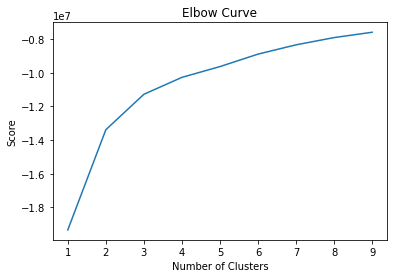

In [29]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

The elbow curve points to 3 clusters being a good fit.

### 05. K-means clustering

In [30]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [31]:
# Fit the k-means object to the data.

kmeans.fit(df)

KMeans(n_clusters=3)

In [32]:
df['clusters'] = kmeans.fit_predict(df)

In [33]:
# Checking for the clusters

df.head()

,Overall Score,Property Rights,Government Integrity,Judicial Effectiveness,Tax Burden,Government Spending,Fiscal Health,Business Freedom,Labor Freedom,Monetary Freedom,Trade Freedom,Investment Freedom,Financial Freedom,clusters
0,59.6,50.0,34.6,43.6,75.6,70.65,78.95,64.8,60.2,76.3,72.2,50.0,50.0,1
1,66.6,55.5,35.6,49.8,89.1,72.10,70.60,70.7,51.1,82.0,82.6,70.0,70.0,1
2,45.8,27.9,30.1,29.7,67.2,57.10,38.60,50.0,51.5,80.1,57.4,30.0,30.0,0
3,52.6,39.8,20.6,25.3,86.6,86.40,80.00,37.6,53.9,61.2,70.0,30.0,40.0,0
4,50.1,35.1,45.1,57.9,73.3,53.00,16.80,55.1,51.0,37.9,60.6,55.0,60.0,1


In [34]:
df['clusters'].value_counts()

1    2780
0    1246
2    1126
Name: clusters, dtype: int64

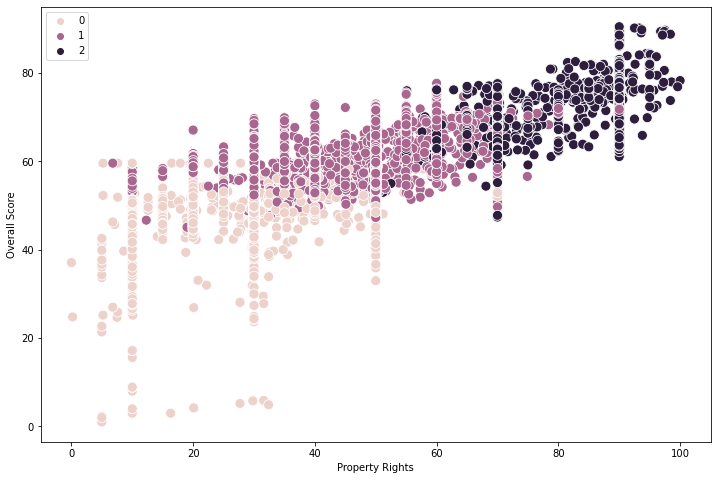

In [35]:
# Plotting the clusters for the "Property Rights" and "Overall Score" variables.
# These variables showed the strongest correlation in the data exploration of Script 02.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Property Rights'], y=df['Overall Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Property Rights') # Label x-axis.
plt.ylabel('Overall Score') # Label y-axis.
plt.show()

This scatter plot with cluster analysis makes sense. While there was not a real linear connection between these two variables - as has been shown in Script 05 - this plot shows that there is a slightly linear trend although linearity doesn't describe the pattern that the data shows fully. 

Furthermore, this clustering shows that 
1. there are years and countries where the scoring in "Property Rights" were high (note the black dots at the "Property Rights" value of 70 and the "Overall Score" value of 50) but that didn't lead to a high scoring in "Overall Score". 


2. There are a few instances where the "Overall Score" is slightly above 50, but the "Property Rights" are relatively high (between 50 and 80). 


3. There are also some instances where the "Property Rights" Score is relatively high (note the pink dots with "Property Rights" values higher than 70 but only 70 at the "Overall Scoring" which also has values above 80) but this doesn't mean the "Overall Scoring" is automatically very high. 


This means that although "Property Rights" and "Overall Score" are strongly correlated, "Property Rights" being better doesn't automatically lead to a high "Overall Score", so the hypothesis I developed in Script 02, "The higher the scoring for Property Rights, the higher the Overall Score for Economic Freedom" can't be veryfied with this analysis.

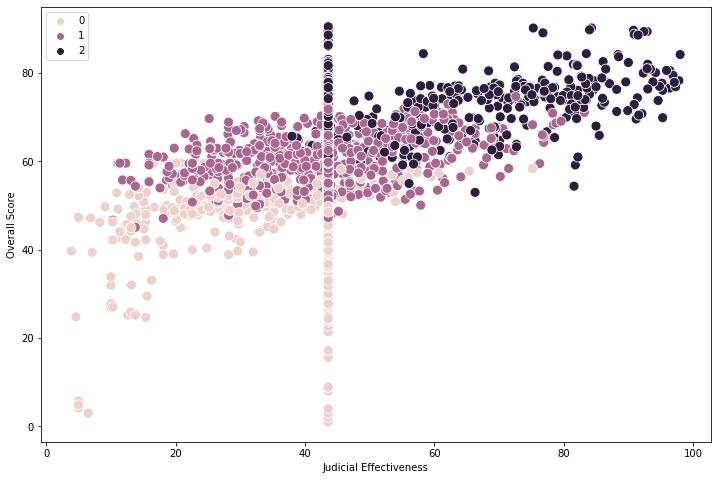

In [36]:
# Plotting the clusters for the "Property Rights" and "Overall Score" variables.
# These variables showed the second strongest correlation in the data exploration of Script 02.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df['Judicial Effectiveness'], y=df['Overall Score'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('Judicial Effectiveness') # Label x-axis.
plt.ylabel('Overall Score') # Label y-axis.
plt.show()

This clustering doesn't make a lot of sense. At the median value, which is 43,6, all three clusters are present. This probably points to the fact that there have been a lot of missing values (4053) imputed with the median, which distorts the analysis.

In [37]:
df.loc[df['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df['clusters'] == 0, 'cluster'] = 'pink'

In [38]:
pd.options.display.max_rows = None
df.groupby('cluster').agg({'Overall Score':['mean', 'median'], 
                         'Property Rights':['mean', 'median'], 
                         'Government Integrity':['mean', 'median'],
                           'Judicial Effectiveness' :['mean', 'median'],
                           'Tax Burden' :['mean', 'median'],
                           'Government Spending':['mean', 'median'],
                           'Fiscal Health' :['mean', 'median'],
                           'Business Freedom':['mean', 'median'],
                           'Labor Freedom' :['mean', 'median'],
                           'Monetary Freedom' :['mean', 'median'],
                           'Trade Freedom' :['mean', 'median'],
                           'Investment Freedom' :['mean', 'median'],
                           'Financial Freedom' :['mean', 'median']})                           

Overall Score        Property Rights        Government Integrity  \
                     mean median            mean median                 mean   
cluster                                                                        
dark purple     72.007105  71.85       80.936679   86.6            72.301954   
pink            46.210193  48.40       25.784029   30.0            22.069663   
purple          60.622338  59.60       46.472302   50.0            35.941547   

                   Judicial Effectiveness        Tax Burden         ...  \
            median                   mean median       mean median  ...   
cluster                                                             ...   
dark purple   73.0              50.565098   43.6  66.020870   65.4  ...   
pink          23.0              40.280578   43.6  70.364045   74.0  ...   
purple        34.6              43.298777   43.6  78.301619   76.9  ...   

            Labor Freedom        Monetary Freedom        Trade Freedom         \
                     mean median             mean median          mean median   
cluster                                                                         
dark purple     64.515897   60.2        81.705684   82.5     81.069627   83.0   
pink            54.884671   60.2        61.617657   68.2     58.973676   61.8   
purple          60.881619   60.2        74.984964   76.3     69.894388   72.2   

            Investment Freedom        Financial Freedom         
                          mean median              mean median  
cluster                                                         
dark purple          73.623446   70.0         68.694494   70.0  
pink                 29.036918   30.0         27.640449   30.0  
purple               55.929856   50.0         51.974820   50.0  

[3 rows x 26 columns]

So many variables! Not all of them can be shown at once, so I will cluster the variables that got left out ("Government Spending", "Fiscal Health", and "Business Freedom") below again:

In [39]:
df.groupby('cluster').agg({'Government Spending':['mean', 'median'],
                           'Fiscal Health' :['mean', 'median'],
                           'Business Freedom':['mean', 'median']})

Government Spending        Fiscal Health        Business Freedom  \
                           mean median          mean median             mean   
cluster                                                                        
dark purple           46.036679   45.8     78.984725  78.95        80.675400   
pink                  66.617978   75.6     75.129735  78.95        49.132183   
purple                72.302266   71.2     75.863112  78.95        63.934065   

                    
            median  
cluster             
dark purple  81.90  
pink         53.55  
purple       64.80

### 06. Exporting the dataframe

In [40]:
# Creating a path

path = r'C:\Users\veren\Python Data\Economic Freedom Index'

In [41]:
df.to_excel(os.path.join(path, '02 Data', 'Prepared Data', 'data-economic-freedom-clusters.xlsx'))